#Import libraries and datasets

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import sklearn.manifold
import matplotlib.pyplot as plt

In [24]:
!pip install scikit-learn
from sklearn.manifold import TSNE

In [28]:
url01 = 'https://raw.githubusercontent.com/anhphuongnguyenquynh/session-based-recsys-fashion/main/dataset_filtered/train_session01_seq.csv'

In [31]:
dataset01 = pd.read_csv(url01, index_col = 0, parse_dates=["date"])
dataset01 = dataset01.dropna()
dataset01 = dataset01.reset_index()
#fraction
dataset = dataset01.sample(frac=0.3)

In [32]:
dataset.head(5)

,session_id,item_id,date,timestamp,month,weekYear,season,duration
269346,2307521.0,2997.0,2020-04-27 17:35:52.267,1.588009e+09,4.0,18.0,1.0,1.0
274083,2347208.0,8724.0,2020-06-28 17:29:41.918,1.593365e+09,6.0,26.0,2.0,1.0
304668,2609136.0,16324.0,2021-02-26 22:01:09.545,1.614377e+09,2.0,8.0,4.0,1.0
226788,1946441.0,11053.0,2020-12-03 19:55:19.653,1.607025e+09,12.0,49.0,4.0,1.0
242818,2084332.0,21310.0,2021-05-16 20:46:36.653,1.621198e+09,5.0,19.0,1.0,1.0


In [33]:
dataset["item_id"] = dataset["item_id"].apply(lambda x: f"item_{x}")

In [34]:
#Group by session_id after sort_values by timestamp
sessions_groups = dataset.sort_values(by=["timestamp"]).groupby("session_id")
sessions_train = pd.DataFrame(data = {
        "session_id": list(sessions_groups.groups.keys()),
        "month" : list(sessions_groups.month.unique().explode()),
        "weekYear" : list(sessions_groups.weekYear.unique().explode()),
        "season" : list(sessions_groups.season.unique().explode()),
        "item_ids": list(sessions_groups.item_id.apply(list)),
        "durations": list(sessions_groups.duration.apply(list)),
        "timestamps": list(sessions_groups.timestamp.apply(list)),
    })

In [35]:
#drop session has item_ids <2
sessions_train = sessions_train[sessions_train.item_ids.apply(len) >= 2]

In [36]:
#store all the item_ids sequence into a list
all_sequence_items = list(sessions_train.item_ids)

In [37]:
all_sequence_items

[['item_13617.0', 'item_13617.0'],
 ['item_2809.0', 'item_4135.0'],
 ['item_20207.0', 'item_2558.0'],
 ['item_15490.0', 'item_5598.0'],
 ['item_12614.0', 'item_26897.0'],
 ['item_8502.0', 'item_3717.0'],
 ['item_4679.0', 'item_13240.0'],
 ['item_20861.0', 'item_7643.0', 'item_17288.0'],
 ['item_22337.0', 'item_22337.0'],
 ['item_400.0', 'item_5288.0'],
 ['item_20070.0', 'item_21305.0'],
 ['item_18329.0', 'item_26962.0'],
 ['item_26140.0', 'item_10414.0', 'item_21070.0'],
 ['item_19943.0', 'item_15307.0'],
 ['item_10896.0', 'item_6071.0'],
 ['item_5791.0', 'item_23071.0', 'item_13108.0'],
 ['item_25369.0', 'item_9185.0'],
 ['item_24671.0', 'item_9932.0'],
 ['item_18642.0', 'item_9823.0'],
 ['item_1051.0', 'item_25028.0', 'item_20280.0'],
 ['item_26548.0', 'item_24803.0'],
 ['item_17315.0', 'item_16722.0'],
 ['item_25064.0', 'item_20828.0'],
 ['item_22221.0', 'item_22667.0'],
 ['item_16991.0', 'item_20923.0'],
 ['item_25580.0', 'item_25061.0'],
 ['item_21886.0', 'item_6256.0', 'item_6052

In [66]:
corpus =[['item1', 'item2', 'item3', 'item4'], ['item2', 'item4', 'item4'], ['item1', 'item5', 'item4'], ['item2', 'item6', 'item7']]

In [81]:
#Create a tokenizer and fit it on the sequence list
tok_obj = Tokenizer()
tok_obj.fit_on_texts(all_sequence_items)
#tok_obj = Tokenizer(num_words=10)
#tok_obj.fit_on_texts(corpus)

In [82]:
check_tok_obj = tok_obj.word_index

In [83]:
#Create mapping dictionaries for items to ids and ids to items
item_to_id = tok_obj.word_index
id_to_item = {v:k for k, v in item_to_id.items()}

In [85]:
#item_ids_list = [[item_to_id[w] for w in sequence] for sequence in corpus]
item_ids_list = [[item_to_id[w] for w in sequence] for sequence in all_sequence_items]

In [86]:
item_ids_list

[[2170, 2170],
 [4876, 7534],
 [7535, 405],
 [178, 4877],
 [742, 179],
 [406, 743],
 [2171, 2172],
 [4878, 4879, 3209],
 [1050, 1050],
 [7536, 1051],
 [1510, 4880],
 [1511, 306],
 [4881, 3210, 1512],
 [4882, 3211],
 [744, 1052],
 [2173, 7537, 64],
 [4883, 239],
 [745, 4884],
 [545, 4885],
 [7538, 7539, 546],
 [3212, 407],
 [4886, 7540],
 [408, 4887],
 [1513, 1514],
 [3213, 4888],
 [131, 1053],
 [746, 43, 747],
 [38, 1515],
 [748, 748],
 [1516, 2174],
 [7541, 4889],
 [3214, 240],
 [241, 180],
 [307, 242],
 [1517, 7542],
 [1054, 7543],
 [65, 4890],
 [1518, 3215, 52],
 [7544, 4891],
 [749, 7545],
 [3216, 4892],
 [1519, 547],
 [4893, 3217, 7546],
 [66, 3218],
 [750, 1055, 3219],
 [1056, 3220],
 [132, 751],
 [7547, 243],
 [77, 548],
 [3221, 7548],
 [7549, 7550],
 [133, 1057],
 [1520, 549],
 [4894, 7551],
 [1058, 1521],
 [409, 3222],
 [2175, 3223],
 [752, 3224],
 [2176, 4895],
 [2177, 7552],
 [753, 1522],
 [2178, 2179],
 [754, 550],
 [3225, 1059],
 [1523, 7553],
 [755, 105],
 [1060, 756],
 [

In [87]:
vocab_size = len(item_to_id) + 1

In [88]:
vocab_size

11725

#Generate Skip Grams

In [96]:
# generate skip-grams
skip_grams = [tf.keras.preprocessing.sequence.skipgrams(wid, vocabulary_size=vocab_size) for wid in item_ids_list]
# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]

In [92]:
len(skip_grams)

16245

In [79]:
labels

[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]

In [101]:
for i in range(4):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id_to_item[pairs[i][0]], pairs[i][0],
          id_to_item[pairs[i][1]], pairs[i][1],
          labels[i]))

(item_13617.0 (2170), item_13617.0 (2170)) -> 1
(item_13617.0 (2170), item_1060.0 (5013)) -> 0
(item_13617.0 (2170), item_14547.0 (11337)) -> 0
(item_13617.0 (2170), item_13617.0 (2170)) -> 1


#Model Architectures

In [102]:
embedding_size = 100

In [103]:
from tensorflow.keras.layers import Concatenate, Dense, Embedding, Reshape
from tensorflow.keras.models import Model

# Define the input layers for the target and context words
target_word_input = tf.keras.Input(shape=(1,))
context_word_input = tf.keras.Input(shape=(1,))

# Build skip-gram architecture
target_word_model = Embedding(vocab_size, embedding_size,
                              embeddings_initializer="glorot_uniform")(target_word_input)
target_word_model = Reshape((embedding_size,))(target_word_model)

context_word_model = Embedding(vocab_size, embedding_size,
                               embeddings_initializer="glorot_uniform")(context_word_input)
context_word_model = Reshape((embedding_size,))(context_word_model)

# Concatenate the output of the target and context models
merged = Concatenate(axis=1)([target_word_model, context_word_model])

# Add a dense layer and sigmoid activation
output = Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid")(merged)

# Define the model
model = Model(inputs=[target_word_input, context_word_input], outputs=output)

# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam")

# View model summary
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 1, 100)               1172500   ['input_3[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, 1, 100)               1172500   ['input_4[0][0]']             
                                                                                            

#Training model

In [105]:
#TRAIN THE MODEL
# train the model on the skip-grams
for epoch in range(1, 6):
    total_loss = 0
    for i, elem in enumerate(skip_grams):
        skip_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        skip_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [skip_first_elem, skip_second_elem]
        Y = labels
        if i % 1000 == 0:
            print('Processed {} skip-gram pairs'.format(i))
        total_loss += model.train_on_batch(X,Y)

    print('Epoch: {} Loss: {}'.format(epoch, total_loss))

Processed 0 skip-gram pairs
Processed 1000 skip-gram pairs
Processed 2000 skip-gram pairs
Processed 3000 skip-gram pairs
Processed 4000 skip-gram pairs
Processed 5000 skip-gram pairs
Processed 6000 skip-gram pairs
Processed 7000 skip-gram pairs
Processed 8000 skip-gram pairs
Processed 9000 skip-gram pairs
Processed 10000 skip-gram pairs
Processed 11000 skip-gram pairs
Processed 12000 skip-gram pairs
Processed 13000 skip-gram pairs
Processed 14000 skip-gram pairs
Processed 15000 skip-gram pairs
Processed 16000 skip-gram pairs
Epoch: 1 Loss: 3962.4989756420255
Processed 0 skip-gram pairs
Processed 1000 skip-gram pairs
Processed 2000 skip-gram pairs
Processed 3000 skip-gram pairs
Processed 4000 skip-gram pairs
Processed 5000 skip-gram pairs
Processed 6000 skip-gram pairs
Processed 7000 skip-gram pairs
Processed 8000 skip-gram pairs
Processed 9000 skip-gram pairs
Processed 10000 skip-gram pairs
Processed 11000 skip-gram pairs
Processed 12000 skip-gram pairs
Processed 13000 skip-gram pairs


#Get Word embeddings to find similar items

In [107]:
#GET WORD EMBEDDINGS
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances

# get the embeddings for the words in the vocabulary
#weights = model.layers[2].get_weights()[0]

embeddings = model.layers[2].get_weights()[0]


# `embeddings` has a shape of (num_vocab, embedding_dim)

# `word_to_index` is a mapping (i.e. dict) from words to their index, e.g. `love`: 69
words_embeddings = {w:embeddings[idx] for w, idx in item_to_id.items()}

# now you can use it like this for example
print(words_embeddings['item_1084.0'])  # possible output: [0.21, 0.56, ..., 0.65, 0.10]

#distance_matrix = euclidean_distances(weights)
#print(distance_matrix.shape)

#similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1]
                   #for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}

#print(similar_words)

[ 0.1184907  -0.13698113 -0.06458937 -0.00782317 -0.16334595 -0.08835474
 -0.14113626 -0.0453313   0.0546848   0.19706178  0.163682    0.10008146
  0.00485257 -0.08174939 -0.01045903  0.08632677  0.03912769 -0.0844876
 -0.09413536 -0.14750062 -0.11139999 -0.04666612 -0.15426269 -0.07182585
  0.01209717  0.14367974  0.21729048 -0.0842806   0.00757037  0.09268852
 -0.03764839 -0.18278803 -0.08730435  0.15898311  0.10382307 -0.08092338
  0.06517801  0.06656485 -0.13667141 -0.03449593  0.03381543 -0.08960041
  0.16991684 -0.12819086 -0.02550551  0.04311473 -0.01922279  0.16904499
 -0.10111205 -0.06436851  0.10085961  0.15979508 -0.08894019  0.01947102
  0.03297635 -0.05363325 -0.12195835 -0.02515859  0.1263872   0.04263525
 -0.08387528 -0.0884572   0.02928525 -0.03682343 -0.0313539  -0.06085045
 -0.0557657  -0.1087861  -0.05763038  0.02567735  0.0274705  -0.07714273
 -0.01017997 -0.13084786  0.04174873  0.02459939  0.00989663  0.11823078
 -0.14707805  0.05860715 -0.18138786 -0.08937886 -0.

In [108]:
embeddings = model.layers[2].get_weights()[0]

In [109]:
embeddings.shape

(11725, 100)

In [110]:
distance_matrix = euclidean_distances(embeddings)

In [111]:
distance_matrix.shape

(11725, 11725)

In [112]:
similar_items = {search_term: [id_to_item[idx] for idx in distance_matrix[item_to_id[search_term]-1].argsort()[1:10]+1]
                   for search_term in ['item_1084.0']}

In [113]:
similar_items

{'item_1084.0': ['item_11705.0',
  'item_1311.0',
  'item_1103.0',
  'item_1746.0',
  'item_307.0',
  'item_22119.0',
  'item_18098.0',
  'item_17323.0',
  'item_6529.0']}

In [116]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('item2vec_model.keras')

In [117]:
new_model = tf.keras.models.load_model('item2vec_model.keras')

In [118]:
# Show the model architecture
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 1, 100)               1172500   ['input_3[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, 1, 100)               1172500   ['input_4[0][0]']             
                                                                                            

In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_images).shape)

In [123]:
#GET WORD EMBEDDINGS
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances

# get the embeddings for the words in the vocabulary
#weights = model.layers[2].get_weights()[0]

new_embeddings = new_model.layers[2].get_weights()[0]

new_distance_matrix = euclidean_distances(new_embeddings)
print(new_distance_matrix)

[[0.         1.4728259  1.2594626  ... 1.0250565  0.950937   0.46627027]
 [1.4728259  0.         2.117766   ... 1.6200873  1.6112549  1.516788  ]
 [1.2594626  2.117766   0.         ... 1.395116   1.3552332  1.3957927 ]
 ...
 [1.0250565  1.6200873  1.395116   ... 0.         0.2260688  1.3225255 ]
 [0.950937   1.6112549  1.3552332  ... 0.2260688  0.         1.2654496 ]
 [0.46627027 1.516788   1.3957927  ... 1.3225255  1.2654496  0.        ]]


In [124]:
new_distance_matrix.shape

(11725, 11725)

In [125]:
#function to get similar item
def similar_item(item):
  similar_items = {search_term: [id_to_item[idx] for idx in new_distance_matrix[item_to_id[search_term]-1].argsort()[1:10]+1]
                   for search_term in [item]}
  list = similar_items[item]
  return list


In [126]:
similar_item('item_1084.0')

['item_11705.0',
 'item_1311.0',
 'item_1103.0',
 'item_1746.0',
 'item_307.0',
 'item_22119.0',
 'item_18098.0',
 'item_17323.0',
 'item_6529.0']

#t-SNE visualization

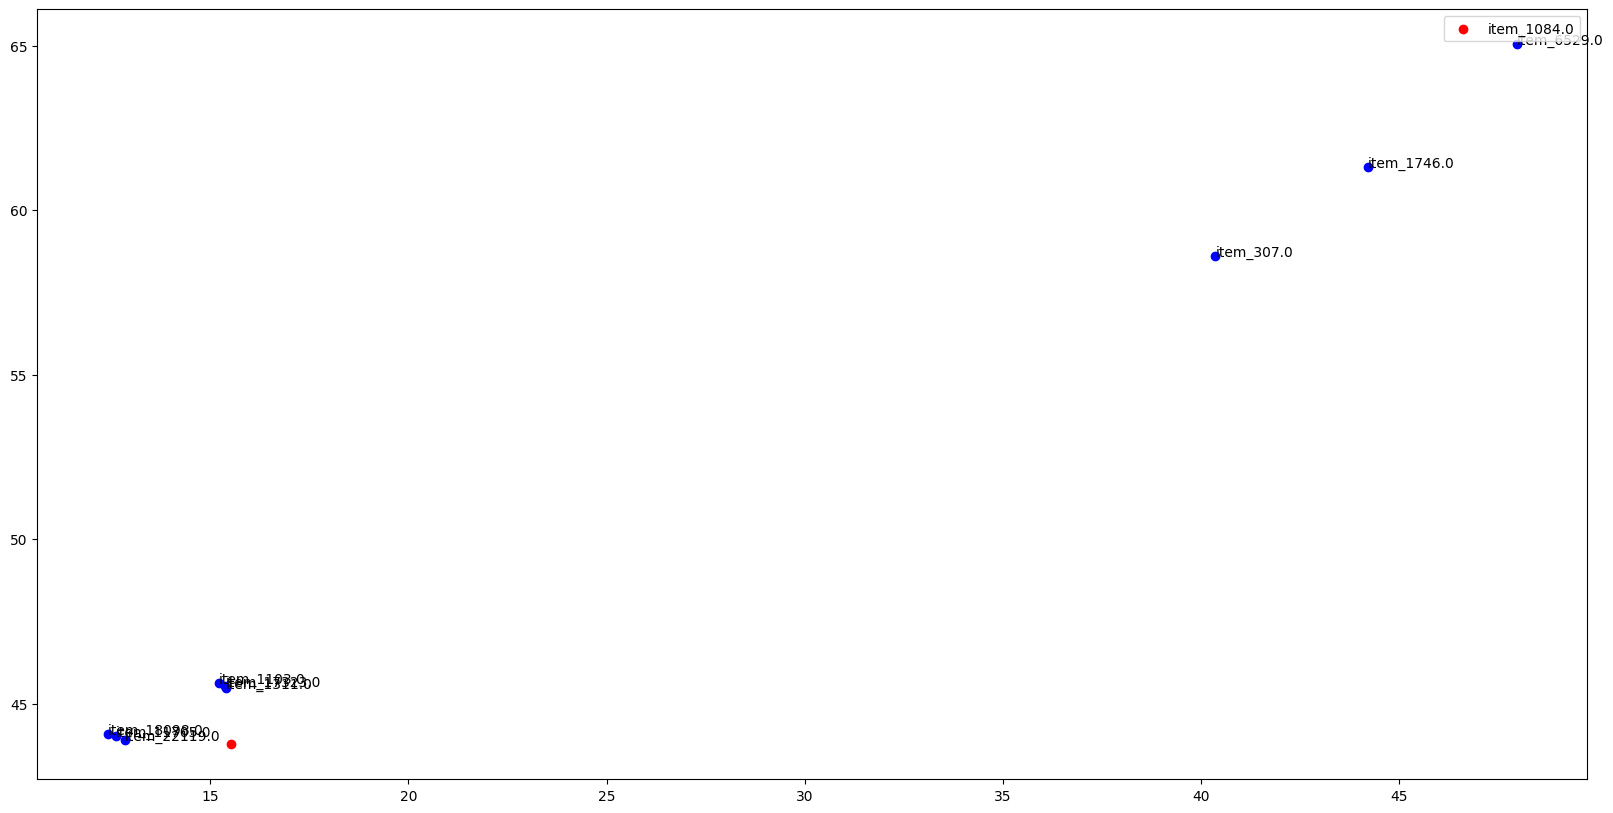

In [114]:
# reduce the dimensions of the embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=3)
vectors_2d = tsne.fit_transform(embeddings)

# create a list of the words in the vocabulary
words = [id_to_item[i] for i in range(1, vocab_size)]

# plot the similar words
fig, ax = plt.subplots(figsize=(20,10))
for word in similar_words:
    ax.scatter(vectors_2d[item_to_id[word]-1, 0], vectors_2d[item_to_id[word]-1, 1], c='red', label=word)
    for sim_word in similar_words[word]:
        ax.scatter(vectors_2d[item_to_id[sim_word]-1, 0], vectors_2d[item_to_id[sim_word]-1, 1], c='blue')
        ax.annotate(sim_word, (vectors_2d[item_to_id[sim_word]-1, 0], vectors_2d[item_to_id[sim_word]-1, 1]))
ax.legend()
plt.show()